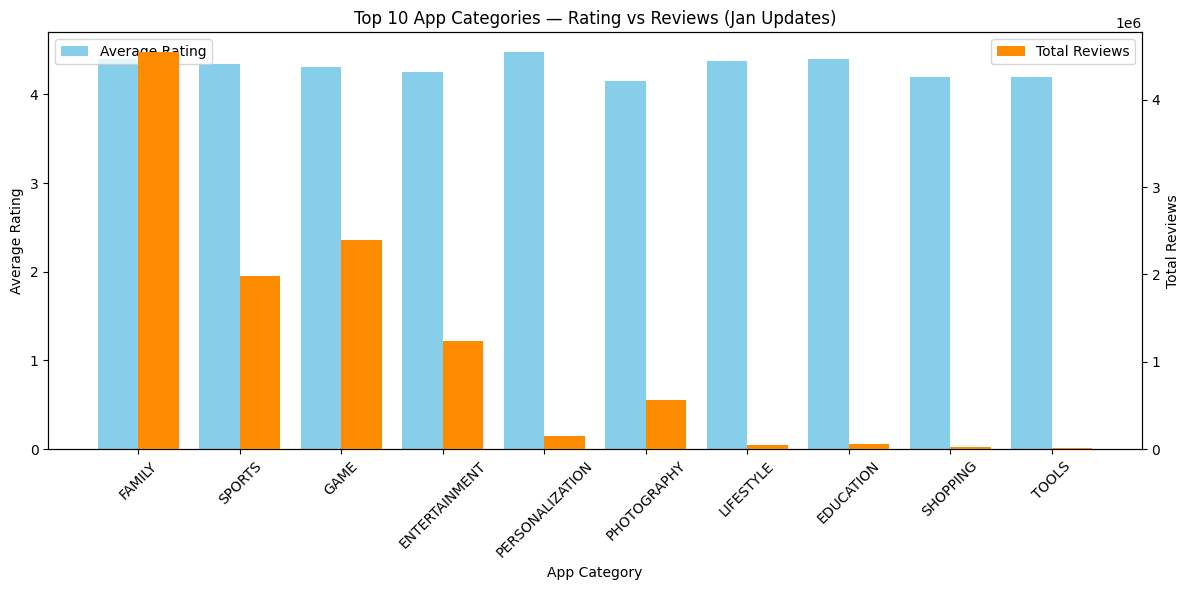

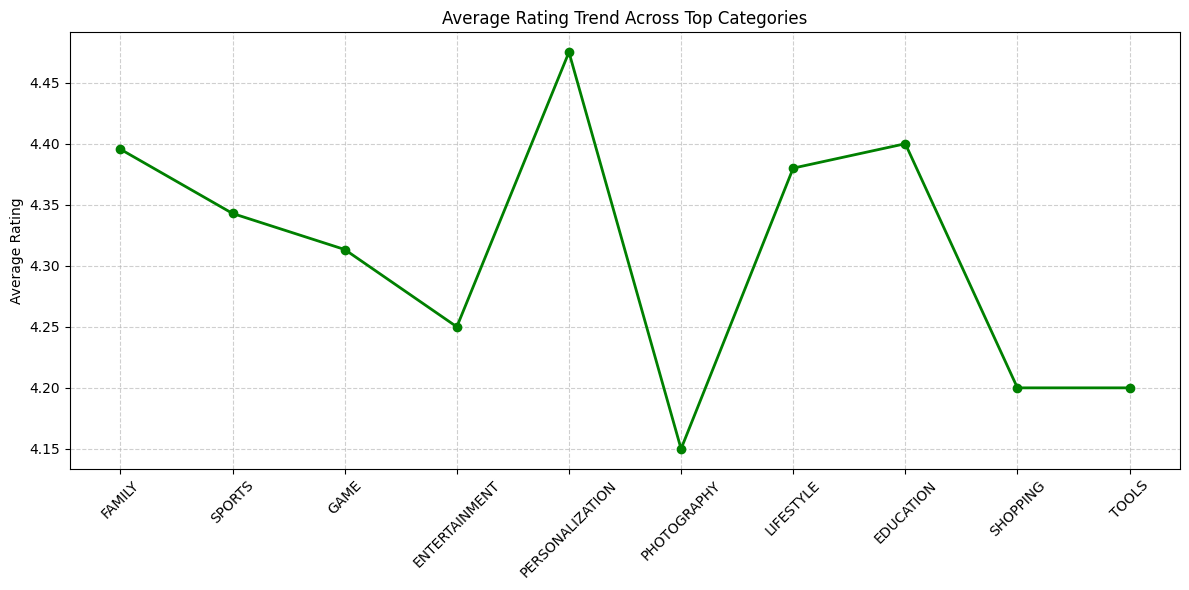

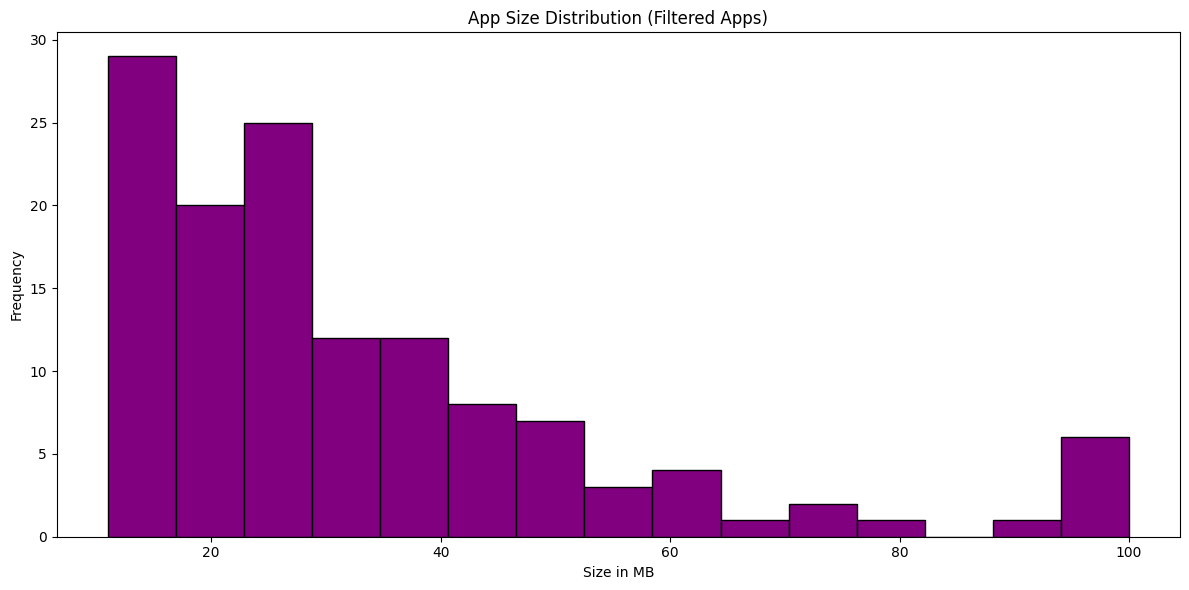

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

# --- Load and clean data ---
df = pd.read_csv("Play Store Data.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

df['Last_Updated'] = pd.to_datetime(df['Last_Updated'], errors='coerce')

def convert_size(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size.replace('M', ''))
        elif size.endswith('k'):
            return float(size.replace('k', '')) / 1024
        elif size.endswith('G'):
            return float(size.replace('G', '')) * 1024
    return None

df['Size_MB'] = df['Size'].apply(convert_size)

df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df = df.dropna(subset=['Category','Rating','Reviews','Installs','Size_MB','Last_Updated'])

# --- Apply filters ---
filtered_df = df[
    (df['Rating'] >= 4.0) &
    (df['Size_MB'] >= 10) &
    (df['Last_Updated'].dt.month == 1)
]

# --- Aggregate top 10 categories ---
top_categories = (
    filtered_df
    .groupby('Category', as_index=False)
    .agg({
        'Installs': 'sum',
        'Rating': 'mean',
        'Reviews': 'sum'
    })
    .sort_values(by='Installs', ascending=False)
    .head(10)
)

# --- TIME CHECK (3 PM – 5 PM IST) --- 15 17 
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 15 <= now.hour < 17:

    # -------- Graph 1: Grouped Bar Chart --------
    x = np.arange(len(top_categories))
    width = 0.4

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax2 = ax1.twinx()

    ax1.bar(x - width/2, top_categories['Rating'], width, label='Average Rating', color='skyblue')
    ax2.bar(x + width/2, top_categories['Reviews'], width, label='Total Reviews', color='darkorange')

    ax1.set_xlabel("App Category")
    ax1.set_ylabel("Average Rating")
    ax2.set_ylabel("Total Reviews")

    ax1.set_xticks(x)
    ax1.set_xticklabels(top_categories['Category'], rotation=45)
    ax1.set_title("Top 10 App Categories — Rating vs Reviews (Jan Updates)")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

    # -------- Graph 2: Line Chart --------
    plt.figure(figsize=(12,6))
    plt.plot(top_categories['Category'], top_categories['Rating'], marker='o', color='green', linewidth=2)
    plt.title("Average Rating Trend Across Top Categories")
    plt.ylabel("Average Rating")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # -------- Graph 3: Histogram --------
    plt.figure(figsize=(12,6))
    plt.hist(filtered_df['Size_MB'], bins=15, color='purple', edgecolor='black')
    plt.title("App Size Distribution (Filtered Apps)")
    plt.xlabel("Size in MB")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

else:
    print("⏰ Chart visible only between 3 PM and 5 PM IST")
